<a href="https://colab.research.google.com/github/aqeel-01/project_bootcamp_ai/blob/main/object_detection_yolo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")

In [3]:


classes = []

with open("./coco.names",'r') as f:
  classes = f.read().splitlines()

In [4]:
len(classes)

80

In [5]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [6]:
img = cv2.imread("./bus_people.jpg")

blob = cv2.dnn.blobFromImage(img, 1/255 , (320,320) , (0,0,0) , swapRB=True , crop = False)

In [7]:
blob.shape

(1, 3, 320, 320)

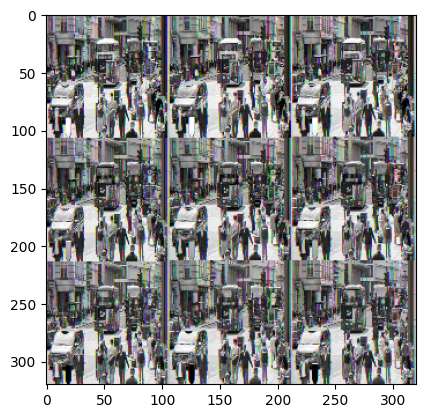

In [8]:
i = blob[0].reshape(320,320,3)

plt.imshow(i)

In [9]:


yolo.setInput(blob)

In [10]:
output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)

In [12]:
import cv2
import numpy as np


height, width, channels = img.shape

boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)  # Corrected center_y calculation
            w = int(detection[2] * width)
            h = int(detection[3] * height)  # Corrected h calculation

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


In [13]:
len(boxes)

3

In [14]:

indexes = cv2.dnn.NMSBoxes(boxes , confidences , 0.5 , 0.4)

In [15]:

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size = (len(boxes) , 3))


In [16]:


for i in indexes.flatten():
  x,y,w,h = boxes[i]

  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i],2))
  color = colors[i]

  cv2.rectangle(img , (x,y) , (x+w ,y+h) , color ,2 )
  cv2.putText(img, label + " " +confi, (x,y+20) , font , 2 , (255,255,255) , 2)


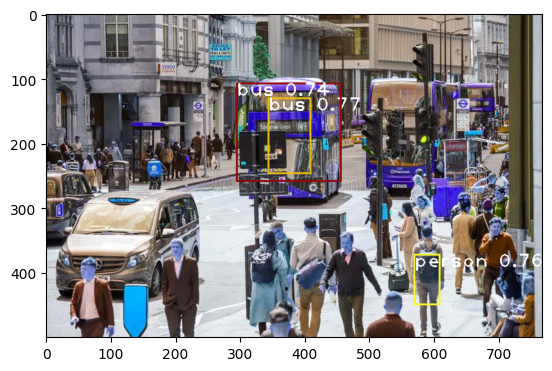

In [17]:
plt.imshow(img)

In [18]:
new_image = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

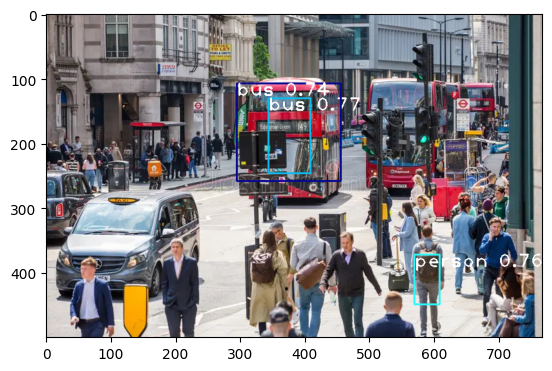

In [19]:
plt.imshow(new_image)

In [20]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
#making model more comprehensive with ui

In [23]:
import gradio as gr
import cv2
import numpy as np

# Load YOLO model
yolo = cv2.dnn.readNet("./yolov3-tiny.weights", "./yolov3-tiny.cfg")
with open("./coco.names", 'r') as f:
  classes = f.read().splitlines()

def detect_objects(image):
  try:
    # Convert image from RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    height, width, _ = image.shape

    # Prepare the image for YOLO
    blob = cv2.dnn.blobFromImage(image, 1/255, (320, 320), (0, 0, 0), swapRB=True, crop=False)
    yolo.setInput(blob)
    output_layers_names = yolo.getUnconnectedOutLayersNames()
    layer_output = yolo.forward(output_layers_names)

    boxes = []

    confidences = []
    class_ids = []

    # Loop through each output layer (assuming single output here)
    for output in layer_output:
      # Loop through each detection in the output layer
      for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.7:
          center_x = int(detection[0] * width)
          center_y = int(detection[1] * height)
          w = int(detection[2] * width)
          h = int(detection[3] * height)

          x = int(center_x - w / 2)
          y = int(center_y - h / 2)

          boxes.append([x, y, w, h])
          confidences.append(float(confidence))
          class_ids.append(class_id)

    # Perform Non-Maximum Suppression (NMS)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size=(len(boxes), 3))

    # Loop through the detections after NMS
    for i in indexes.flatten():
      x, y, w, h = boxes[i]
      label = str(classes[class_ids[i]])
      confi = str(round(confidences[i], 2))
      color = colors[i]

      cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
      cv2.putText(image, label + " " + confi, (x, y + 20), font, 2, (255, 255, 255), 2)

    # Convert image back to RGB for Gradio display
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  except Exception as e:
    print(f"Error: {e}")
    return image

# Define Gradio interface
iface = gr.Interface(
  fn=detect_objects,
  inputs=gr.Image(type="numpy", label="Upload Image"),
  outputs=gr.Image(type="numpy", label="Detected Image"),
  title="YOLOv3-Tiny Object Detection",
  description="Upload an image and see object detection results using YOLOv3-Tiny model."
)

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://420ed2d7ddccc95437.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
